<p align="center">
<img src="https://github.com/datacamp/python-live-training-template/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>

## **Working with text data in Python**

Welcome to this hands-on training where you will beging to learn how to work with text data in Python. We will primarily use `pandas` string methods in this training, but will also use some `matplotlib` for visualization. In this session you will learn:

- How to explore and visualize your text data.
- How to manipulate and clean text data for further analysis.
- The basics of regex, and how to use it to filter a DataFrame.
- How to use prepare a template that is easily reusable.

## **The Dataset**

The dataset to be used in this webinar is a CSV file named `wine_reviews.csv`, which contains data on wine reviews. In particular, it contains the following columns:

**Columns**:

`country`: The country that the wine is from

`description`: The review.

`designation`: The vineyard within the winery.

`points`: The number of points awarded to the wine on a scale from 1-100.

`province`: The province or state where the ine originated from.

`region`: The wine growing area within the province or state.

`variety`: The type of grapes used to make the wine.

## Import necessary packages and set pandas display
The majority of the work we will do with this data will use `pandas`. If you have followed the DataCamp course Regular Expressions in Python, you will have worked a lot with the `re` package. `pandas` uses `re`, but allows us to apply the functions to large sets of data, which is perfect for our wine reviews dataset.

We will also set the display option `display.max_colwidth` to allow us to see the entire reviews when we print the DataFrame.

We will also import the `WordCloud` function and set of `STOPWORDS` from the `wordcloud` package to enable us to visualize our text data. We as well as to import `matplotlib.pyplot` and `seaborn` to allow for some visualizations later in the training. Using `sns.set()` sets specific aesthetics of our future plots, which will help make our visualizations more visually pleasing.

Lastly, we will import `re` to allow us to do some testing on our regular expressions later in the training.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re

## Import wine data, and look at the first five rows
Let's first import the data which is stored in the csv `wine_reviews.csv` using `pandas.read_csv()`, and then examine the first five rows using the `.head()` method.

In [ ]:
wine_df = pd.read_csv('https://github.com/jsaddlemyer/python-live-training-text_data/blob/master/data/wine_reviews.csv?raw=true')
wine_df.head()

**Observation:** From first glance, it looks as though there are a variety of different cases in the `variety` column, which is something that we will want to investigate more closely later in the training.

Exploring the data
---
First, now that we have an idea how our data is structured, and a little bit about what it contains, let's dig into the details a bit more. To do so, we will use the `.info()` method on the DataFrame to learn about the data types and missing values.

In [ ]:
wine_df.info()

**Observation:** The two numeric columns, points and price, are correctly specified as integers and floats. However, it appears as though there are a lot of missing values for the designation column, which specifies what winery the wine originated from.

**Next**, let's look at the `variety` column in a bit more detail, because when we checked the head we saw a few different cases that may pose a problem to our analyses down the line.

To do so, let's select the column, sort the values alphabetically using `sort_values()`, and then access the unique values using `.unique()`.

In [19]:
wine_df['variety'].sort_values().unique()

array([' BORDEAUX-STYLE RED BLEND', ' Bordeaux-style red blend',
       ' CABERNET SAUVIGNON', ' CHARDONNAY', ' Cabernet sauvignon',
       ' Chardonnay', ' MERLOT', ' Merlot', ' PINOT NOIR', ' Pinot noir',
       ' RED BLEND', ' RIESLING', ' Red blend', ' Riesling',
       ' SAUVIGNON BLANC', ' SYRAH', ' Sauvignon blanc', ' Syrah',
       ' bordeaux-style red blend', ' cabernet sauvignon', ' chardonnay',
       ' merlot', ' pinot noir', ' red blend', ' riesling',
       ' sauvignon blanc', ' syrah', 'BORDEAUX-STYLE  RED  BLEND',
       'BORDEAUX-STYLE RED BLEND', 'BORDEAUX-STYLE RED BLEND ',
       'Bordeaux-style  red  blend', 'Bordeaux-style red blend',
       'Bordeaux-style red blend ', 'CABERNET  SAUVIGNON',
       'CABERNET SAUVIGNON', 'CABERNET SAUVIGNON ', 'CHARDONNAY',
       'CHARDONNAY ', 'Cabernet  sauvignon', 'Cabernet sauvignon',
       'Cabernet sauvignon ', 'Chardonnay', 'Chardonnay ', 'MERLOT',
       'MERLOT ', 'Merlot', 'Merlot ', 'PINOT  NOIR', 'PINOT NOIR',
      

**Observation:** Above, we see a mess of wine varieties. You may also notice that they aren't in alphabetical order, despite using `sort_values()`. Why is this? If you pay careful attention, you will see that the first entries have spaces at the beginning. The order is also affected by the case of the first letter. However, despite this it seems clear that there are many duplicate entries of wine varieties that we will need to address.

I am also curious about how reviewers describe wine, as this may inform some of the analyses we will perform later in the notebook. A common way to explore text data is through a word cloud. Here, we will use the `WordCloud()` function we imported earlier to visualize the `description` column. But first, let's look at the set of `STOPWORDS` we imported, which is a built-in set of words we can use to eliminate from appearing in our wordcloud.

In [44]:
stopwords = STOPWORDS
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

As you can see, this set contains the type of words that are common and not particularly informative for our purposes (we want to learn about wine!).

First, let's join together all of the text data from the description column. 

We can do this using the `.join()` method, which will take all items in an iterable (in this case, the string values of each row in the `description` column) and combines them using a given separator. In this case, we just pass `" "` to join all of the reviews by a space.

In [45]:
# Join all the reviews by a space
text = " ".join(wine_df['description'])

# Preview first 2000 characters to see whether reviews have been joined
text[0:2000]

"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030. Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar. This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso.

Great! We have now stiched together the reviews. Let's begin by creating a wordcloud with the `WordCloud()` function, and assign the object to `wordcloud`. We will also need to specify some arguments:
- `collocations`: whether we include bigrams of words (e.g. "the wine")
    - In this wordcloud, our stopwords are only built for individual words, rather than bigrams. So let's turn this off.
- `width` and `height`: width and height of the wordcloud canvas
- `background_color`: the color of the background
- `stopwords`: words that will be eliminated from the wordcloud (in this case, the common ones we loaded in earlier)

We then create the figure, pass in our `wordcloud` object to `plt.imshow()`, turn off the axis, and finally call the plot with `plt.show()`.

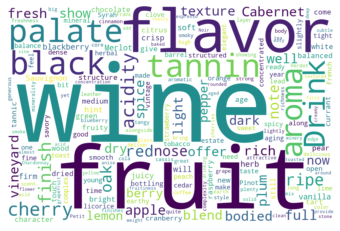

In [46]:
wordcloud = WordCloud(
    collocations=False, 
    width = 1200, height = 800, 
    background_color="white", 
    stopwords=stopwords)
    
wordcloud.generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Hmmm, not bad, but despite the use of stopwords there are still some common words to this set of reviews that are probably not all that informative. Let's update our stopwords list, as well as to tweak the background color, font color, and image size.

1. We can update our set of `stopwords` by calling `.update()`, passing in a list of words that we don't want to appear in the wordcloud.

2. We can update the background color by updating the `background_color` argument.

3. Lastly, we can update the size of the wordcloud by specifying the figure size in `plt.figure()`. Wordcloud is built upon `matplotlib`, so we can adjust figure characteristics by using our `plt` alias for `matplotlib.pyplot`.

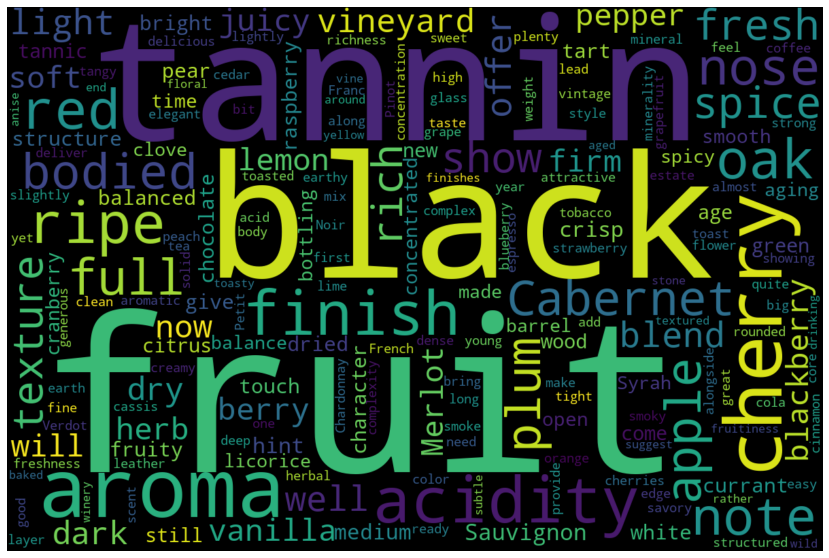

In [48]:
stopwords.update(["flavor", "flavors", "wine", "drink", "palate"])

wordcloud = WordCloud(
    collocations=False, 
    width = 1200, height = 800, 
    background_color="black", 
    stopwords=stopwords)

wordcloud.generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

That's a bit more like it! Okay, one word that pops out to me is 'tannin', which is a new word to me.

**_noun_** <br>
1. _Chemistry._ any of a group of astringent vegetable principles or compounds, chiefly complex glucosides of catechol and pyrogallol, as the reddish compound that gives the tanning properties to oak bark or the whitish compound that occurs in large quantities in nutgalls **(common tannin, tannic acid)**.
2. any of these compounds occurring in wine and imparting an astringent taste, especially in red wine.

_Courtesy of dictionary.com_

---
## Q&A 1
---

## Cleaning the data
Okay, let's do something about the missing values in the `designation` columnn. One option would be to replace all missing values with something like `"unknown"`. However, we know that the vineyard will belong to the winery specified in the `winery` column. So let's use that data to make missing values in the column a little more informative.

In this step, we will use the `fillna()` method on the `designation` column, and supply data from the `winery` column combined with  `" - unknown"`. Using the argument `inplace=True` ensures that the operation takes place without having to assign the result to the existing series.

We can then check whether our operation was a success by looking at the `.sample()` of the DataFrame, where we have a good chance of seeing one of our operations.

In [59]:
wine_df['designation'].fillna(wine_df['winery'] + " - unknown", inplace=True)
wine_df.sample(5)

,country,description,designation,points,price,province,region,variety,winery,location
3214,US,"Just one barrel was made of this reserve. At first the new oak shines through, then as it opens out the wood becomes less noticeable and a complex array of spice, stem and iron filings comes into play. The fruit is light and textural, showing hints of sassafras and even a whiff of petrol.",Select Whole Cluster,92,150.0,Oregon,McMinnville,pinot noir,Hyland,McMinnville - US
1680,US,"Sourced from the estate's Paderewski and Catapult vineyards, this blend of 32% Syrah, 25% Grenache, 25% Mourvèdre, 10% Tempranillo and 8% Zinfandel bursts with blackberry, baking spice, violet and Concord grape aromas. Framed by firm but ready tannins, the palate shows blackberry, cola, white pepper and dried lavender flavors.",Estate Blend,94,50.0,California,Paso Robles,red blend,Epoch Estate Wines,Paso Robles - US
3005,US,"Black cherry, chipped slate and an earthy nutmeg character show on the nose of this stylishly labeled bottling. Medium in weight, it offers energetic and tart cranberry-cherry flavors as well as a menthol element on the palate, which is tangy throughout and wipes up clean.",Liberated - unknown,87,20.0,California,Monterey County,pinot noir,Liberated,Monterey County - US
2328,Australia,"Only released in top vintages, this is Jim Barry's luxury cuvée of Cabenet Sauvignon. It does see plenty of oak, so it shows impressive notes of baking spices, vanilla and brown sugar, but it backs those with ample dark fruit. It's elegant despite its size, with a fine-grained tannins lingering on the finish. Drink now–2025, and possibly beyond.",The Benbournie,93,83.0,South Australia,Clare Valley,cabernet sauvignon,Jim Barry,Clare Valley - AU
3153,Italy,"Aromas of beeswax, lychee and fragrant white flowers take center stage in this wine. The juicy palate offers ripe Bartlett pear and lemon drop alongside fresh acidity.",Rohracker,87,17.0,Northeastern Italy,Alto Adige,riesling,Peter Zemmer,Alto Adige - IT


Perfect! We can also now check the DataFrame using `.info()` again to ensure there are no missing values.

In [60]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4131 entries, 0 to 4130
Data columns (total 10 columns):
country        4131 non-null object
description    4131 non-null object
designation    4131 non-null object
points         4131 non-null int64
price          4131 non-null float64
province       4131 non-null object
region         4131 non-null object
variety        4131 non-null object
winery         4131 non-null object
location       4131 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 322.9+ KB


Currently, there are a number of location attributes scattered across columns. While it is useful to have them separately, let's also make a column that combines this data into a useful `location` column. 

In particular, let's take the first two characters of the `country` name, and then combine them with the `region`. To do so, we will use string indexing in combination string concatenation and the `.str.upper()` method.

First, let's go over string indexing. Strings are Python objects that are made up of one or more characters, ranging from letters to numbers to white space and symbols. Much like a list, characters can be accessed at points just as you would a list entry. Consider the examples below:

In [61]:
# Create a variable storing the word winery
x = "winery"

# Print out the first letter of x
x[0]

'w'

In [62]:
# Print out the first four letters
x[0:4]

'wine'

In [63]:
# Print from the fourth letter until the end
x[4:]

'ry'

Great! Now we know how to access various elements in a string, let's go over how to combine different strings together. Thankfully, this is incredibly easy in Python, and we can accomplish this through string concatenation. This is as simple as adding the strings (or variables containing the strings together). 

In the example below, we join the word `"the"` with our `x` variable containing `"winery"`, and separate the two words by also adding a space (`" "`).

In [64]:
# Create another variable storing the word the
y = "the"

y + " " + x

'the winery'

Now let's use this information to create our new column.

In [65]:
# Create a location column, and assign to it the region, 
# a hyphen, and the first two characters of the country column in upper case
wine_df['location'] =  wine_df['region']+ " - " + wine_df['country'].str[0:2].str.upper()
wine_df.sample(5)

,country,description,designation,points,price,province,region,variety,winery,location
1879,Spain,"Jammy plum and currant aromas are light on complexity. This blend is crisp, fresh and ultimately modest in feel, with black cherry and plum flavors. A clean finish makes it good for everyday drinking.",Tempranillo-Garnacha-Syrah,85,9.0,Northern Spain,Cariñena,red blend,Las Valles,Cariñena - SP
3458,France,"Château du Cros began life in the 12th century, commanding a superb military vantage point over the Garonne river. The surrounding vineyards have produced a fresh and fruity Merlot-Cabernet Sauvignon blend with a mineral bite that gives a strong sense of structure. Its weight and a firm texture act as a foil to the juicy red berries and attractive acidity. The wine is almost drinkable now but will be better from 2016.",Château du Cros - unknown,88,17.0,Bordeaux,Cadillac Côtes de Bordeaux,bordeaux-style red blend,Château du Cros,Cadillac Côtes de Bordeaux - FR
3746,US,"Its prime location near Archery Summit and Domaine Drouhin marks Nysa as one of Oregon's most sought-after fruit sources. Mark McNeilly (of Mark Ryan Winery) has chosen it for one of two vineyard designates for this new project. Sweet baking spices and raspberry jam are the hallmarks here, offering immediate appeal, while retaining the structure to age for another decade. Aim for an optimal drinking window from 2019 through 2024.",Nysa Vineyard,91,55.0,Oregon,Dundee Hills,pinot noir,Megan Anne,Dundee Hills - US
2600,US,"There's a light whiff of the chicken coop here, adding an unexpected note of earthiness to the fresh raspberry fruit. The flavors spread out horizontally across the palate, coating it completely and lingering with a finishing touch of mint chocolate cookie.",Guadalupe Vineyard,92,63.0,Oregon,Willamette Valley,pinot noir,Ken Wright,Willamette Valley - US
2053,US,"Baked cherry, cardamom and cola meet a bright, citrusy undertone in this memorable wine. Lively, fresh and seamless in texture, it provides plenty of power, depth and complexity, without ever feeling heavy.",Keefer Ranch,93,70.0,California,Russian River Valley,pinot noir,Della,Russian River Valley - US


Great! One final step remains before we can begin looking at trends. Our `variety` column is a bit of a mess! Let's use a variety of string functions provided by pandas to set the varieties to lowercase, strip leading and trailing spaces, and replace any double spaces with single spaces!

To do this, we will use (in order):
- `series.str.strip()`
- `series.str.lower()`
- `series.str.replace()`

In [66]:
# Remove leading and trailing spaces from the variety column
wine_df['variety'] = wine_df['variety'].str.strip()

# Set the variety names to lower case
wine_df['variety'] = wine_df['variety'].str.lower()

# Replace all double spaces with single spaces
wine_df['variety'] = wine_df['variety'].str.replace("  ", " ")

Now, let's double check that we have a cleaned list of wine varieties using the same combination of `sort_values()` and `unique()` that we used before.

In [67]:
wine_df['variety'].sort_values().unique()

array(['bordeaux-style red blend', 'cabernet sauvignon', 'chardonnay',
       'merlot', 'pinot noir', 'red blend', 'riesling', 'sauvignon blanc',
       'syrah'], dtype=object)

Perfect, we now have a set of cleaned and distinct variety names to start analyzing our data!

---
## Q&A 2
---

## Let's learn about oak!
---
Okay, we have some cleaned data, it's time to start exploring these reviews and learning what we can about the oakiness of wines. First, let's do some basic searches for mentions of oak in the `description` column of the DataFrame.
- `series.str.contains()` will return a Boolean whether a given pattern or string is found in the string of the series. It is based off of `re.search`. We can use this to subset our DataFrame for mentions of oak. For now, we will use the optional parameters `case` and `regex` to ensure that our search is not case sensitive, and to specify that we are not using a regular expression pattern, and instead simply a string.

In [68]:
# Create our Boolean filter
oak_filter = wine_df['description'].str.contains('oak', case=False, regex=False)

# Filter our DataFrame using our oak_filter and look at the first five rows
wine_df[oak_filter][0:5]

,country,description,designation,points,price,province,region,variety,winery,location
0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.",Martha's Vineyard,96,235.0,California,Napa Valley,cabernet sauvignon,Heitz,Napa Valley - US
2,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032.",Reserve,96,65.0,Oregon,Willamette Valley,pinot noir,Ponzi,Willamette Valley - US
9,US,"This blockbuster, powerhouse of a wine suggests blueberry pie and chocolate as it opens in the glass. On the palate, it's smooth and seductively silky, offering complex cedar, peppercorn and peppery oak seasonings amidst its dense richness. It finishes with finesse and spice.",Rainin Vineyard,95,325.0,California,Diamond Mountain District,cabernet sauvignon,Hall,Diamond Mountain District - US
14,US,"Focused and dense, this intense wine captures the essence of ripe raspberries. Aged in 50% new French oak, it's got a strong vein of coffee and mocha. The flavors broaden out and penetrate, finishing with highlights of cedar, cinnamon and dark chocolate. Drink now through the 2020s, but decant if you want the full expression.",Abetina,94,105.0,Oregon,Willamette Valley,pinot noir,Ponzi,Willamette Valley - US
17,US,"Steely and perfumed, this wine sees only 20% new French oak, remaining vibrantly fresh. Baked apple and lemon pith veer into grapefruit on the palate, with spiciness to the finish that's both brash and loud.",Babushka,90,37.0,California,Russian River Valley,chardonnay,Zepaltas,Russian River Valley - US


Great! At first glance, this seems to have worked. Take for example the third result, which describes the wine with the following sentence:

_"On the palate, it's smooth and seductively silky, offering complex cedar, peppercorn and peppery **oak** seasonings amidst its dense richness."_

However, take a look at the first result. Although the review does make reference to being aged in `oak`, it also references the wine coming from `Oakville`. Thus, tere may be a risk that our query is grabbing descriptions that contain Oakville, and not oak.

Introduction to Regular Expressions
---
We could add a space after `'oak'` to ensure that we don't get Oakville, but what about when the word ends a sentence, or `'oakiness'` and `'oaky'`? Enter regular expressions, which allow us to define patterns to find and extract text.

Regular expressions are strings that make use of normal and special characters to help define a pattern which we can then compare to our text of interest. Here, we will make use of a few special characters to write a pattern for `oak` and related adjectives. But first, let's try out some simple examples by using the digit special character.

`\d`: Matches any digit character (i.e. 0-9)

`{}`: Quantifies the number of matches. 
- `{1,5}` will match between 1 and 5.
- `{2,}` will match at least two.

There are many more special characters we can use to write complex regular expression (or regex) patterns, but let's see what we can do with what we have learned so far. To test our patterns, we will make use of the `re` package, and for now use `findall()` to find all matches of our patterns in a test string.

In [77]:
# Create a very contrived test string
test_string = """
This tremendous 100% varietal wine hails from Oakville 
and was aged over three years in oak. Juicy red-cherry fruit 
and a compelling hint of caramel greet the palate, framed by elegant, 
fine tannins and a subtle 20% minty tone in the background. 
Balanced and rewarding from start to finish, 
it has years ahead of it to develop further nuance. There are absolutely no
bad tannins in this wine. But there is a tasy tannin.
Enjoy 2022–2030."""

# Let's find all years in this review
re.findall("\d\d\d\d", test_string)

['2022', '2030']

In [78]:
# Let's find all percentages in this review
re.findall("\d{1,3}%", test_string)

['100%', '20%']

Great! We have successfully used special characters and quantifiers to write patterns to look for elements in our data that might be hard to find otherwise. Let's expand a bit on some other special characters before diving back into our dataset!

`\w`: Matches any alphanumeric character or underscore (i.e. A-Z, a-z, 0-9, \_)

`+`: Matches between 1 or more of the preceding character.

`?`: Matches 0 or more of the preceding character.

In [87]:
# Find all mentions of tannin, as well as the word that precedes it for context
re.findall("\w+ tannins?", test_string)

['fine tannins', 'bad tannins', 'tasy tannin']

Okay, hopefully by now you are starting to see the potential in regular expressions! Let's use these to develop a more precise pattern when looking at oaky wines! In doing so, we will introduce three new tools: white space, character sets, and alternation!

1. First, we want to ensure that it is preceded by a space, because there may be cases where a word contains the same characters (e.g. `'cloak`'). We do this by using the `\s` character class, which matches any white space, such as spaces, tabs, and line breaks.

```
\s
```

2. We then want to search for a capitalized or non-capitalized `'o'`. To do this, we can use a character set `[]`, which matches any character in the square brackets. We then add `'a'` and `'k'` as these characters will be in every variant of oak we want to search for.

```
[Oo]ak
```

3. Next, we want to allow our search to include `'iness'`, `'y'`, or any additional punctuation or white space. We can do this using capturing groups and alternation. Here, we use one large capturing group, and then search for any of the inner groups using `|`. So the first set of bracketed characters look for `'iness'`, the second set looks for `y`, and then we use a character set that allows for a period, a comma, or white space.
```
((iness)|(y)|[/.,\s])
```

Putting the pieces together, we now have a pattern that will capture all references to oak that we expect to find, while also not matching with words like `'Oakville'`. Let's add these together, and then assign them to the variable `oak_pattern`.

In [110]:
oak_pattern = '\s[Oo]ak((iness)|y|[/.,\s])'

It is always a good idea to test that your regular expression is returning the results that you would expect, especially when you are working with longer and more complex patterns. There are many resources online where you can test patterns, such as www.regexr.com

For the purposes of this training, let's use `re.search()` to test whether our pattern is working as expected. `re.search()` will check all lines of the input string, and return a match object if it finds an occurence of the pattern, and `NULL` if it doesn't. We can use this to test two different sentences, and then print the match object.

In [111]:
x = re.search(oak_pattern, "This tremendous 100% varietal wine hails from Oakville.")
if x:
    print("Yes, an oak match!")
else:
    print("No, oak isn't here!")

No, oak isn't here!


In [112]:
x = re.search(oak_pattern, "This tremendous wine is oaky.")
if x:
    print("Yes, an oak match!")
else:
    print("No, oak isn't here!")

Yes, an oak match!


In [113]:
# View the first (and only) match
x[0]

' oaky'

Filtering the DataFrame using regex to find interesting patterns
---
Now that we have a functioning pattern, we can use it to gain insights about the oakiness of wines. First, we use our pattern to filter the DataFrame, again using `str.contains()`, but this time using a regular expression.

We can assign this filtered DataFrame to a new one, titled `oak_wines`, which we can use for further analyses. Let's also call `.head()` to do a sense check on the new DataFrame.

In [103]:
oak_wines = wine_df[wine_df['description'].str.contains(oak_pattern)]
oak_wines.head()

/Users/justin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,country,description,designation,points,price,province,region,variety,winery,location
0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.",Martha's Vineyard,96,235.0,California,Napa Valley,cabernet sauvignon,Heitz,Napa Valley - US
2,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032.",Reserve,96,65.0,Oregon,Willamette Valley,pinot noir,Ponzi,Willamette Valley - US
9,US,"This blockbuster, powerhouse of a wine suggests blueberry pie and chocolate as it opens in the glass. On the palate, it's smooth and seductively silky, offering complex cedar, peppercorn and peppery oak seasonings amidst its dense richness. It finishes with finesse and spice.",Rainin Vineyard,95,325.0,California,Diamond Mountain District,cabernet sauvignon,Hall,Diamond Mountain District - US
14,US,"Focused and dense, this intense wine captures the essence of ripe raspberries. Aged in 50% new French oak, it's got a strong vein of coffee and mocha. The flavors broaden out and penetrate, finishing with highlights of cedar, cinnamon and dark chocolate. Drink now through the 2020s, but decant if you want the full expression.",Abetina,94,105.0,Oregon,Willamette Valley,pinot noir,Ponzi,Willamette Valley - US
17,US,"Steely and perfumed, this wine sees only 20% new French oak, remaining vibrantly fresh. Baked apple and lemon pith veer into grapefruit on the palate, with spiciness to the finish that's both brash and loud.",Babushka,90,37.0,California,Russian River Valley,chardonnay,Zepaltas,Russian River Valley - US


Wonderful! Now, let's start to get an idea of the ratios of oakiness between varieties of wines. Let's start by grouping our two DataFrames, `oak_wines` and `wine_df` by the variety and counting the number of references.

To do this, we will change a few methods. First, we will `groupby()` the `variety`, then we will aggregate by `count()`. We will then select one of the columns (all of the columns of the DataFrame will contain count values, so we can choose anything). Lastly, we will `sort_index` so that we have an alphabetically sorted index to use for plotting.

We can use `display()` to view the two series to ensure that we have the grouping we would expect.

In [104]:
oak_grouped = oak_wines.groupby('variety').count()['country'].sort_index(ascending=False)
wine_grouped = wine_df.groupby('variety').count()['country'].sort_index(ascending=False)

display(oak_grouped)
display(wine_grouped)

variety
syrah                       27 
sauvignon blanc             23 
riesling                    5  
red blend                   97 
pinot noir                  172
merlot                      35 
chardonnay                  175
cabernet sauvignon          165
bordeaux-style red blend    21 
Name: country, dtype: int64

variety
syrah                       237 
sauvignon blanc             291 
riesling                    202 
red blend                   536 
pinot noir                  1033
merlot                      149 
chardonnay                  696 
cabernet sauvignon          527 
bordeaux-style red blend    460 
Name: country, dtype: int64

Let's start by doing a simple plot of the grouped DataFrames. By overlaying the `oak_grouped` data over the `wine_grouped` data, we can get a rough visualization of the ratios of oaky wines. To do this, we will use `matplotlib.pyplot.barh` to make two horizontal barplots.

In addition to specifying `y` values (the indexes of the series) and the values (the relevant series) for the plot, we can use different colors and set a title to make the plot easier to interpret.

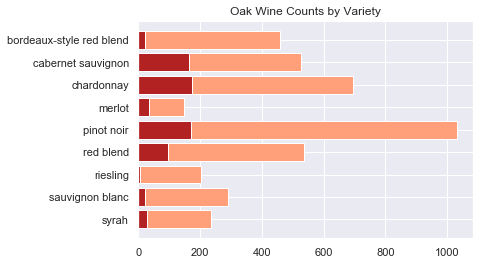

In [105]:
plt.barh(wine_grouped.index.values, wine_grouped, color='lightsalmon')
plt.barh(oak_grouped.index.values, oak_grouped, color='firebrick')
plt.title("Oak Wine Counts by Variety")
plt.show()

Clearly there are some varieties that are more likely to be described as oaky than others. Let's create a Boolean (True/False) column called `'oaky'` using our pattern, and then use a `groupby()` to calculate the percentage of each variety that is described as oaky.

When calculating the `.mean()` of a Boolean column, `pandas` treats True as 1 and False as 0, which allows us to easily generate the percentage of each variety that has been described as oaky. `sort_values()` orders the resulting series to be easier to plot.

In [106]:
wine_df['oaky'] = wine_df['description'].str.contains(oak_pattern)
oak_freq = wine_df.groupby('variety').mean()['oaky'].sort_values()
oak_freq

variety
riesling                    0.024752
bordeaux-style red blend    0.045652
sauvignon blanc             0.079038
syrah                       0.113924
pinot noir                  0.166505
red blend                   0.180970
merlot                      0.234899
chardonnay                  0.251437
cabernet sauvignon          0.313093
Name: oaky, dtype: float64

Finally, let's plot our results to have a visual representation of the oakiness of different wine varieities.

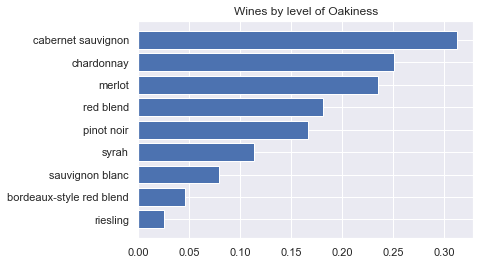

In [115]:
plt.barh(oak_freq.index, oak_freq)
plt.title("Wines by level of Oakiness")
plt.show()

Finally, let's produce some replicable output!
---
Let's create some variables from our filtered datasets, and use these to write a replicable expression that adapts based on new data.

We can get the number of mentions of oak and the total number of reviews by using the `len()` function on the two respective DataFrames.

Next, we can grab the wine with the highest percentage of oak mentions by using `.idmax()` on our `oak_freq` series. `idmax()` will return the index of the row with the highest value (i.e. the name of the wine variety).

In [118]:
oak_num = len(oak_wines)
wine_num = len(wine_df)

oak_wine = oak_freq.idxmax()

Okay, now let's embed our three variables into an fstring. Fstrings allow us to insert our variables into strings using curly brackets `{}`. We simply need to add an `f` as a prefix to our string. Here, we assign the fstring to the variable `text`, and call it inside a print function.

We now have a simple and dynamic summary of our data!

In [119]:
text = f"There were {oak_num} mentions of 'oak' from amongst {wine_num} reviews. The most oaky wine was {oak_wine}."
print(text)

There were 720 mentions of 'oak' from amongst 4131 reviews. The most oaky wine was cabernet sauvignon.


Text-ellent! We now have code with variables embedded within the string. ALet's test what happens if we make up some new values for these variables and run the code again.

In [124]:
oak_num = 834
wine_num = 5103
oak_wine = 'chardonnay'

text = f"There were {oak_num} mentions of 'oak' from amongst {wine_num} reviews. The most oaky wine was {oak_wine}."
print(text)

There were 834 mentions of 'oak' from amongst 5103 reviews. The most oaky wine was chardonnay.


## What's next?
Now that you have started your Pythonic-text journey, there are a variety of more advanced topics for you to tackle!
- Natural language processing
- Sentiment analysis
- More advanced regular expressions
- Feature engineering for machine learning